The notebook for cleaning the dataset and doing exploratory data analysis can be found [here](https://github.com/AngelineJCQ/project-japan-young-pop-movement/blob/main/Clean-and-Exploratory-Data-Analysis.ipynb). This notebook is only for reproducing the necessary findings for the final project.

In [12]:
# importing data analysis package
import pandas as pd
import numpy as np
import re
pd.set_option('display.max_columns', None)

# importing visualization package
from plotnine import *


# Load the data

## city_data_2017
**Containing one-year data of young popolation movement in 20 big cities of Japan**
   - name in English and Japanese character
        - city
        - 市
   - 2017 move in/out young population devided by age and gender
        - m_15-19, m_20-24, m_25-29
        - f_15-19, f_20-24, f_25-29
        - male_move = m_15-19 + m_20-24 + m_25-29
        - female_move = f_15-19 + f_20-24 + f_25-29
   - 2017 university student number devided by gender
        - male_uni_student
        - female_uni_student
        - student_total
   - 2017 population of the city
        - total_pop

### city_pct

**Containing one-year data of 20 big cities in Japan devided by 2017 population**
   - every column from city_data_2017 is kept
   - 2017 move in/out young population percentage devided by age and gender
        - pct_15_19 = (m_15_19 + f_15_19) / population
        - pct_15_19_male = m_15_19 / population


##  six_year_data
**Containing six-year data of all cities and counties in Japan**
   - name and catagory of the place
        - place
        - city_county
   - year of the data
        - year_x
   - move in/out young population devided by age and gender
        - m_15-19, m_20-24, m_25-29
        - f_15-19, f_20-24, f_25-29
   - 2020 population of the city devided by gender
        - year_y = 2020
        - total_pop
        - male_pop
        - female_pop

### df_pct

**Containing six-year data of all cities and couties in Japan devided by 2020 population**
   - name and catagory of the place
        - place
        - city_county
   - year of the data
        - year_x
   - move in/out young population percentage devided by age and gender
        - m_15-19, m_20-24, m_25-29
        - f_15-19, f_20-24, f_25-29
        - total_youth, total_male_youth, total_female_youth
   - 2020 population of the city devided by gender
        - total_pop
        - male_pop
        - female_pop


In [13]:
city_data_2017 = pd.read_csv("2017_city_data.csv")
city_data_2017.columns = city_data_2017.columns.str.replace('-','_')
city_data_2017.head()

,city,市,m_15_19,m_20_24,m_25_29,f_15_19,f_20_24,f_25_29,male_uni_student,female_uni_student,student_total,population,male_move,female_move
0,Sapporo,札幌市,518,197,172,838,1239,196,26780,17610,44390,1952356,887,2273
1,Sendai,仙台市,638,314,110,620,679,-28,21796,17548,39344,1082159,1062,1271
2,Saitama,さいたま市,436,911,585,270,1074,715,9556,4856,14412,1263979,1932,2059
3,Chiba,千葉市,265,489,-38,265,345,-169,12145,10343,22488,971882,716,441
4,Tokyo,特別区部,4434,23602,10216,5367,27772,9750,245162,217508,462670,9272740,38252,42889


In [14]:
city_pct = city_data_2017.copy()

city_pct['pct_15_19'] = (city_pct.m_15_19 + city_pct.f_15_19) / city_pct.population
city_pct['pct_20_24'] = (city_pct.m_20_24 + city_pct.f_20_24) / city_pct.population
city_pct['pct_25_29'] = (city_pct.m_25_29 + city_pct.f_25_29) / city_pct.population
city_pct['pct_15_19_male'] = city_pct.m_15_19 / city_pct.population
city_pct['pct_15_19_female'] = city_pct.f_15_19 / city_pct.population
city_pct['pct_20_24_male'] = city_pct.m_20_24 / city_pct.population
city_pct['pct_20_24_female'] = city_pct.f_20_24 / city_pct.population
city_pct['pct_25_29_male'] = city_pct.m_25_29 / city_pct.population
city_pct['pct_25_29_female'] = city_pct.f_25_29 / city_pct.population
city_pct.head()

,city,市,m_15_19,m_20_24,m_25_29,f_15_19,f_20_24,f_25_29,male_uni_student,female_uni_student,student_total,population,male_move,female_move,pct_15_19,pct_20_24,pct_25_29,pct_15_19_male,pct_15_19_female,pct_20_24_male,pct_20_24_female,pct_25_29_male,pct_25_29_female
0,Sapporo,札幌市,518,197,172,838,1239,196,26780,17610,44390,1952356,887,2273,0.000695,0.000736,0.000188,0.000265,0.000429,0.000101,0.000635,0.000088,0.000100
1,Sendai,仙台市,638,314,110,620,679,-28,21796,17548,39344,1082159,1062,1271,0.001162,0.000918,0.000076,0.000590,0.000573,0.000290,0.000627,0.000102,-0.000026
2,Saitama,さいたま市,436,911,585,270,1074,715,9556,4856,14412,1263979,1932,2059,0.000559,0.001570,0.001028,0.000345,0.000214,0.000721,0.000850,0.000463,0.000566
3,Chiba,千葉市,265,489,-38,265,345,-169,12145,10343,22488,971882,716,441,0.000545,0.000858,-0.000213,0.000273,0.000273,0.000503,0.000355,-0.000039,-0.000174
4,Tokyo,特別区部,4434,23602,10216,5367,27772,9750,245162,217508,462670,9272740,38252,42889,0.001057,0.005540,0.002153,0.000478,0.000579,0.002545,0.002995,0.001102,0.001051


In [15]:
df = pd.read_csv("output_2016_2021.csv").replace(',','', regex=True).drop_duplicates(['year', 'place', 'city_county'])
pop20 = pd.read_csv('each_pop_2020.csv', thousands=',')
six_year_data = df.merge(pop20, how='left', on='place')
six_year_data.head()

,year_x,place,total_15_19,total_20_24,total_25_29,m_15_19,m_20_24,m_25_29,f_15_19,f_20_24,f_25_29,city_county,year_y,total_pop,male_pop,female_pop
0,2016,札幌市,1485.0,1643.0,205.0,588.0,463.0,75.0,897.0,1180.0,130.0,city,2020.0,1973395.0,918682.0,1054713.0
1,2016,函館市,-325.0,-322.0,-169.0,-213.0,-153.0,-59.0,-112.0,-169.0,-110.0,city,2020.0,251084.0,113965.0,137119.0
2,2016,小樽市,-16.0,-333.0,-192.0,-21.0,-189.0,-58.0,5.0,-144.0,-134.0,city,2020.0,111299.0,50136.0,61163.0
3,2016,旭川市,-242.0,-283.0,-286.0,-155.0,-99.0,-97.0,-87.0,-184.0,-189.0,city,2020.0,329306.0,152108.0,177198.0
4,2016,室蘭市,96.0,-208.0,-159.0,108.0,-138.0,-95.0,-12.0,-70.0,-64.0,city,2020.0,82383.0,40390.0,41993.0


In [43]:
six_year_data[six_year_data.place == '神戸市']

,year_x,place,total_15_19,total_20_24,total_25_29,m_15_19,m_20_24,m_25_29,f_15_19,f_20_24,f_25_29,city_county,year_y,total_pop,male_pop,female_pop
727,2016,神戸市,349.0,152.0,-860.0,146.0,-505.0,-338.0,203.0,657.0,-522.0,city,2020.0,1525152.0,716452.0,808700.0
1838,2017,神戸市,375.0,-102.0,-1080.0,153.0,-495.0,-491.0,222.0,393.0,-589.0,city,2020.0,1525152.0,716452.0,808700.0
2950,2018,神戸市,305.0,-186.0,-925.0,138.0,-532.0,-381.0,167.0,346.0,-544.0,city,2020.0,1525152.0,716452.0,808700.0
4062,2019,神戸市,310.0,165.0,-705.0,101.0,-402.0,-276.0,209.0,567.0,-429.0,city,2020.0,1525152.0,716452.0,808700.0
5174,2020,神戸市,306.0,-54.0,-1277.0,86.0,-412.0,-693.0,220.0,358.0,-584.0,city,2020.0,1525152.0,716452.0,808700.0
6286,2021,神戸市,520.0,-244.0,-580.0,254.0,-417.0,-230.0,266.0,173.0,-350.0,city,2020.0,1525152.0,716452.0,808700.0


In [16]:
df_pct = six_year_data.copy().assign(
    total_youth = lambda x: x.total_15_19 + x.total_20_24 + x.total_25_29,
    total_male_youth =  lambda x: x.m_15_19 + x.m_20_24 + x.m_25_29,
    total_female_youth =  lambda x: x.f_15_19 + x.f_20_24 + x.f_25_29
)
migration_columns = ['total_15_19', 'total_20_24', 'total_25_29', 
                     'm_15_19', 'm_20_24', 'm_25_29', 
                     'f_15_19', 'f_20_24', 'f_25_29',
                     'total_youth', 'total_male_youth', 'total_female_youth']

for column in migration_columns:
    df_pct[column] = df_pct[column] / df_pct['total_pop'] * 100

df_pct['city_county'] = df_pct.city_county.replace({'Tokyo': 'city'})

df_pct.head()

,year_x,place,total_15_19,total_20_24,total_25_29,m_15_19,m_20_24,m_25_29,f_15_19,f_20_24,f_25_29,city_county,year_y,total_pop,male_pop,female_pop,total_youth,total_male_youth,total_female_youth
0,2016,札幌市,0.075251,0.083258,0.010388,0.029796,0.023462,0.003801,0.045455,0.059795,0.006588,city,2020.0,1973395.0,918682.0,1054713.0,0.168897,0.057059,0.111838
1,2016,函館市,-0.129439,-0.128244,-0.067308,-0.084832,-0.060936,-0.023498,-0.044607,-0.067308,-0.043810,city,2020.0,251084.0,113965.0,137119.0,-0.324991,-0.169266,-0.155725
2,2016,小樽市,-0.014376,-0.299194,-0.172508,-0.018868,-0.169813,-0.052112,0.004492,-0.129381,-0.120396,city,2020.0,111299.0,50136.0,61163.0,-0.486078,-0.240793,-0.245285
3,2016,旭川市,-0.073488,-0.085938,-0.086849,-0.047069,-0.030063,-0.029456,-0.026419,-0.055875,-0.057393,city,2020.0,329306.0,152108.0,177198.0,-0.246276,-0.106588,-0.139688
4,2016,室蘭市,0.116529,-0.252479,-0.193001,0.131095,-0.167510,-0.115315,-0.014566,-0.084969,-0.077686,city,2020.0,82383.0,40390.0,41993.0,-0.328951,-0.151730,-0.177221


# Reproduce the findings

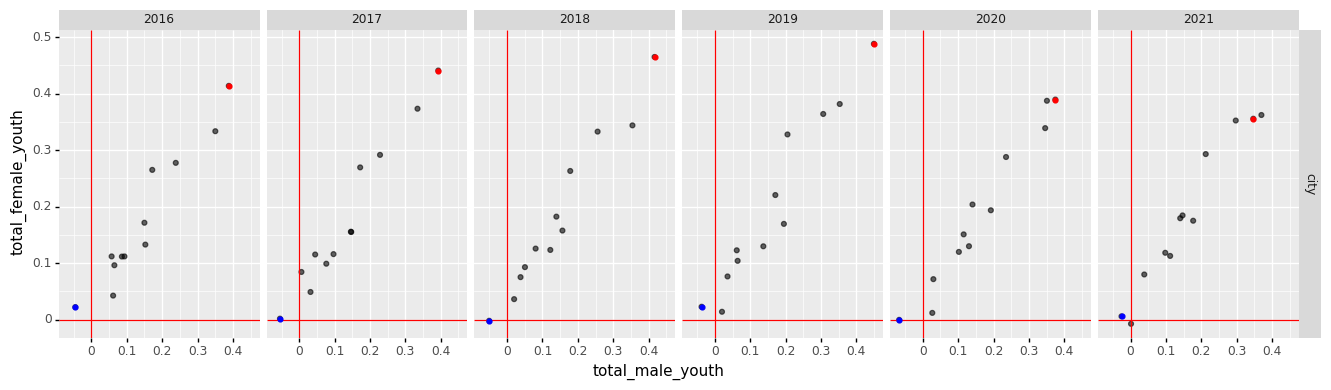

<ggplot: (304354241)>

In [54]:
p = (
    ggplot(df_pct.query('total_pop > 1000000'), aes(x='total_male_youth', y='total_female_youth')) + 
        geom_point(alpha=.6) +
        geom_hline(aes(yintercept=0), color='red') + 
        geom_vline(aes(xintercept=0), color='red') + 
        geom_point(data=df_pct.query("place=='特別区部'"), color='red') +
        geom_point(data=df_pct.query("place=='神戸市'"), color='blue') +
        facet_grid('city_county~year_x') + 
        theme(figure_size=(16,4))
)
p

In [56]:
p.save(filename = 'viz1.pdf', units = 'in', dpi=1000)

/Users/angeline_jcq/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 16 x 4 in image.
/Users/angeline_jcq/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: viz1.pdf


In [41]:
df_pct.query('total_pop > 1000000').sort_values(by=['total_youth']).tail(10)

,year_x,place,total_15_19,total_20_24,total_25_29,m_15_19,m_20_24,m_25_29,f_15_19,f_20_24,f_25_29,city_county,year_y,total_pop,male_pop,female_pop,total_youth,total_male_youth,total_female_youth
5907,2021,特別区部,0.082470,0.510167,0.109655,0.038055,0.243279,0.065559,0.044415,0.266889,0.044096,city,2020.0,9733276.0,4774402.0,4958874.0,0.702292,0.346892,0.355399
1494,2017,川崎市,0.099008,0.443032,0.165316,0.055062,0.213748,0.065463,0.043946,0.229285,0.099853,city,2020.0,1538262.0,775772.0,762490.0,0.707357,0.334273,0.373083
5941,2021,川崎市,0.081456,0.503230,0.147114,0.048171,0.254053,0.067609,0.033284,0.249177,0.079505,city,2020.0,1538262.0,775772.0,762490.0,0.731800,0.369833,0.361967
3717,2019,川崎市,0.091597,0.483338,0.159336,0.048626,0.238646,0.065594,0.042971,0.244692,0.093742,city,2020.0,1538262.0,775772.0,762490.0,0.734270,0.352866,0.381404
5137,2020,大阪市,0.055842,0.487681,0.194666,0.021072,0.223331,0.106634,0.034770,0.264350,0.088032,city,2020.0,2752412.0,1326875.0,1425537.0,0.738189,0.351038,0.387151
4795,2020,特別区部,0.069483,0.536387,0.158251,0.031521,0.254591,0.088716,0.037963,0.281796,0.069535,city,2020.0,9733276.0,4774402.0,4958874.0,0.764121,0.374828,0.389293
349,2016,特別区部,0.102648,0.499287,0.199953,0.049459,0.236395,0.102514,0.053189,0.262892,0.097439,city,2020.0,9733276.0,4774402.0,4958874.0,0.801888,0.388369,0.413520
1460,2017,特別区部,0.100696,0.527818,0.205131,0.045555,0.242488,0.104960,0.055141,0.285330,0.100172,city,2020.0,9733276.0,4774402.0,4958874.0,0.833645,0.393002,0.440643
2571,2018,特別区部,0.098117,0.550185,0.233334,0.045545,0.253019,0.118419,0.052572,0.297166,0.114915,city,2020.0,9733276.0,4774402.0,4958874.0,0.881635,0.416982,0.464653
3683,2019,特別区部,0.091963,0.591846,0.253532,0.042493,0.274008,0.132936,0.049469,0.317837,0.120597,city,2020.0,9733276.0,4774402.0,4958874.0,0.937341,0.449438,0.487904


In [36]:
df_pct.query('total_pop > 1000000').place.value_counts()

札幌市      6
仙台市      6
さいたま市    6
特別区部     6
横浜市      6
川崎市      6
名古屋市     6
京都市      6
大阪市      6
神戸市      6
広島市      6
福岡市      6
Name: place, dtype: int64

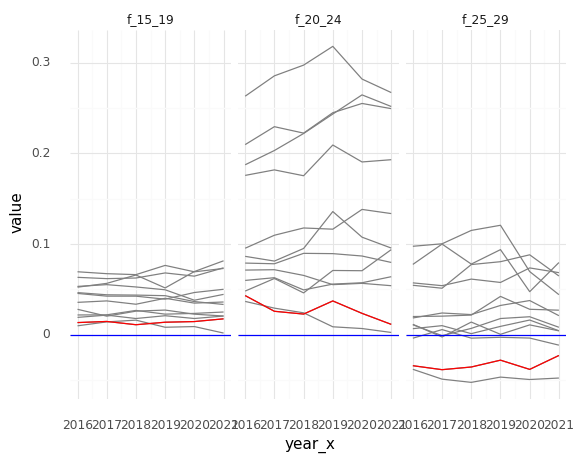

<ggplot: (305182284)>

In [18]:
melted = df_pct.query('total_pop > 1000000')[['year_x', 'place', 'f_15_19','f_20_24','f_25_29']].melt(id_vars=['year_x', 'place'])
(
    ggplot(melted, aes(x='year_x', y='value', group='place')) + 
        geom_line(color='grey') +
        geom_line(melted.query("place=='神戸市'"), color='red') +
        geom_hline(yintercept=0, color='blue') +
        facet_wrap('variable') + theme_minimal()
)

/Users/angeline_jcq/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 5 rows containing missing values.


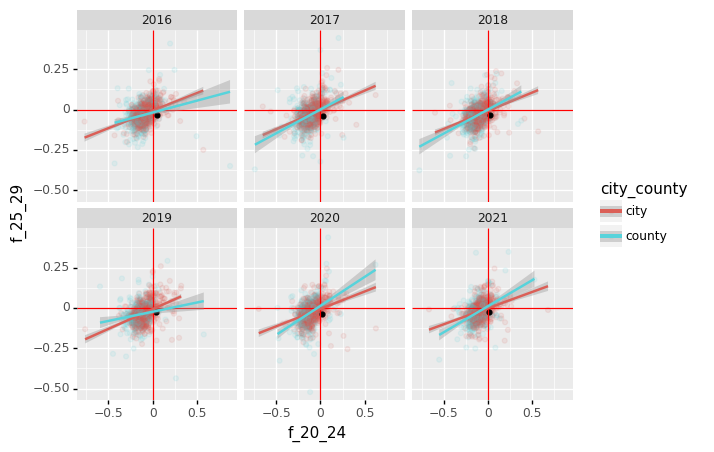

<ggplot: (305567016)>

In [19]:
(
    ggplot(df_pct, aes(y='f_25_29', x= 'f_20_24',color='city_county'))
    + geom_point(alpha=.1)
    + geom_point(df_pct.query("place=='神戸市'"), aes(y='f_25_29', x= 'f_20_24'), color= 'black')
    + geom_hline(aes(yintercept=0), color='red')
    + geom_vline(aes(xintercept=0), color='red')
    + facet_wrap("year_x")
    + stat_smooth(method='lm')
)